cdfからtplot変数を作成

In [2]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

pytplot.cdf_to_tplot('ak_h1_mca_19890607_v02.cdf')
tplot_names = pytplot.tplot_names(True)

for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_power = (10**(tplot_variable.y/10)) * (tplot_variable_0dB**2) / bandwidth 
    pytplot.store_data(tplot_names[i] +'_power', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})


In [ ]:
tplot_variable = pytplot.get_data('Emax')
tplot_variable

プロット

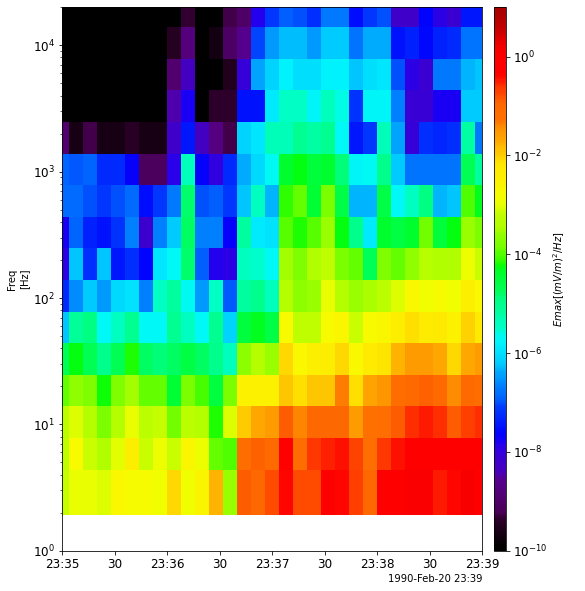

In [3]:
tlimit(['1991-07-11 23:35:00', '1990-02-20 23:39:00'])
options('Emax_power', 'spec', 1)
options('Emax_power', 'ytitle', 'Freq')
options('Emax_power', 'ysubtitle', '[Hz]')
options('Emax_power', 'ztitle', '$Emax [(mV/m)^2/Hz]$')
options('Emax_power', 'zrange', [1e-10, 1e1])
options('Emax_power', 'yrange', [1,20000])
options('Emax_power', 'ylog', 1)
options('Emax_power', 'zlog', 1)
options('Bmax_power', 'spec', 1)
options('Bmax_power', 'ytitle', 'Freq')
options('Bmax_power', 'ysubtitle', '[Hz]')
options('Bmax_power', 'ztitle', '$Bmax [pT^2/Hz]$')
options('Bmax_power', 'zrange', [1e-8, 1e5])
options('Bmax_power', 'yrange', [1,20000])
options('Bmax_power', 'ylog', 1)
options('Bmax_power', 'zlog', 1)
tplot('Emax_power', slice = True)


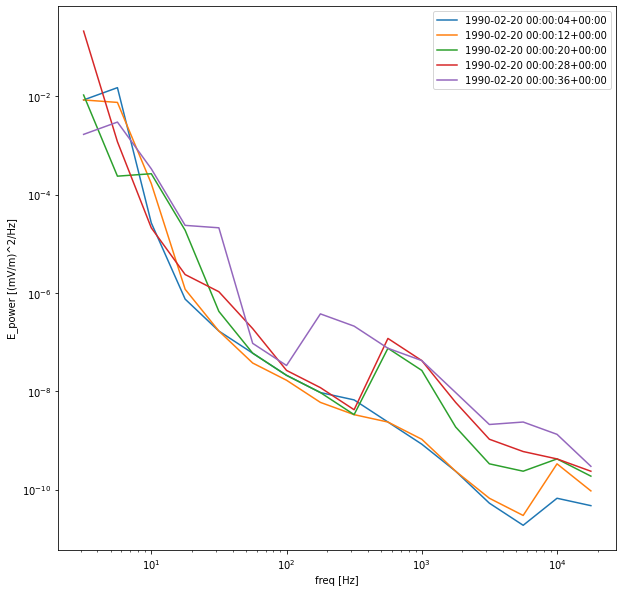

In [34]:
Emax_power = pytplot.get_data('Emax_power')
time = Emax_power.times
slice_time = pyspedas.time_double('1989-06-07 23:38:00')
for i in range(time.size):
    if time[i] > slice_time:
        pass
    else:
        slice_time_index = i
        slice_time = time[i]
        break
Emax_power_slice = Emax_power.y[slice_time_index]
freq_range = Emax_power.v

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(5):
    plt.plot(freq_range, Emax_power.y[slice_time_index + i], label = pyspedas.time_datetime(time[slice_time_index + i]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq [Hz]')
plt.ylabel('E_power [(mV/m)^2/Hz]')

plt.legend()
plt.savefig("output2.jpg")

In [1]:
a = ['/orb/20210405.cdf', '/orb/20201201.cdf', '/orb/20210408.cdf']
a_sorted = sorted(a)
a_sorted

['/orb/20201201.cdf', '/orb/20210405.cdf', '/orb/20210408.cdf']

In [2]:
import pyspedas 


In [6]:
a = pyspedas.time_double('2014-01-01')
b = pyspedas.time_double('2014-01-02')
b-a

86400.0

In [8]:
from pyspedas.utilities.dailynames import dailynames
trange = ['2021-01-01', '2021-01-03']
file_names = dailynames(file_format='/ED%y%m%d.txt', trange=trange)
file_names

['/ED210101.txt', '/ED210102.txt']

In [11]:
import pyspedas
import pytplot
from pytplot import options
from pytplot import tplot
from pytplot import tlimit
from pytplot import tplot_options
import Akebono_mca_load
import Akebono_orb_load
import numpy as np

date = '19910611'
importer2 = Akebono_orb_load.Akebono_orb_load(date)
importer2.orb()